# Chapter 3 Applied Problems
Jack Krebsbach Stats 313
11/3/23

Problems 8,9 and 13

## Imports

In [108]:
# User defined libraries
from lib import abline

In [109]:
# Packages 
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

## \#8
Simple linear regression

(a)

In [110]:
# Load the Auto data set
data = load_data('Auto')

In [111]:
# Create model matrix and fit the data
y = data.mpg
design = MS(['horsepower'])
design = design.fit(data)
X = design.transform(data)

In [112]:
# Fit the data
model = sm.OLS(y,X)
results = model.fit()

# Get the R^2 Value
print(f'R-Squared: {results.rsquared}')
summarize(results)


R-Squared: 0.6059482578894348


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [113]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)

# New prediction from fitted model
new_prediction = results.get_prediction(newX)

# Confidence Interval
conf_int = new_prediction.conf_int(alpha=0.05)
print(f'Confidence Interval: {conf_int}')

# Prediction Interval
pred_int = new_prediction.conf_int(obs=True,alpha=0.05)
print(f'Prediction Interval: {pred_int}')


Confidence Interval: [[23.97307896 24.96107534]]
Prediction Interval: [[14.80939607 34.12475823]]



#### I. 
Yes, there is a relationship between the predictor and the response.

#### II.
The relationship is not that strong between horsepower and miles per gallon. The R^2 value is 0.60, approximately 60% of variation in MPG can be explained by horsepower. When horsepower increases by one, mpg is expected to decrease by -0.1578 on average.

#### III. 
The correlation between horsepower and mpg is negative.

#### IV. 
The confidence interval for the predicted mpg from a car with 98 horsepower is (23.97, 24.96) and the prediction interval is (14.80, 34.12). This is expected, as the prediction interval is a confidence interval for a particular value of predicted mpg while the confidence interval relays information of averages.

(b)

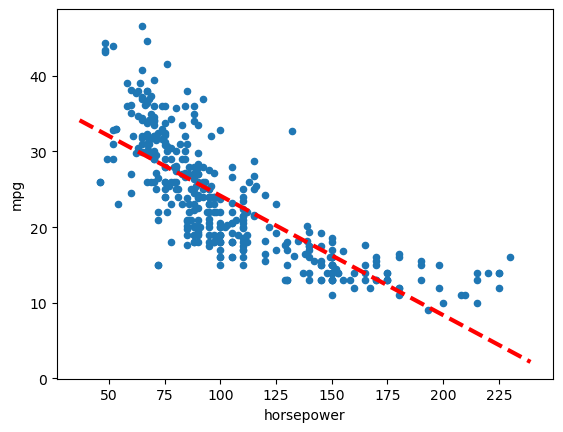

In [114]:
ax = data.plot.scatter('horsepower', 'mpg')
abline(ax,
    results.params[0],
    results.params[1],
    'r--', linewidth=3)

(c) Create plots of the residuals and see if there are any data points that greatly influence the data set.

It does not appear that there are any outliers, but the plot of residuals suggest there is a non-linear relationship between the response and predictors.

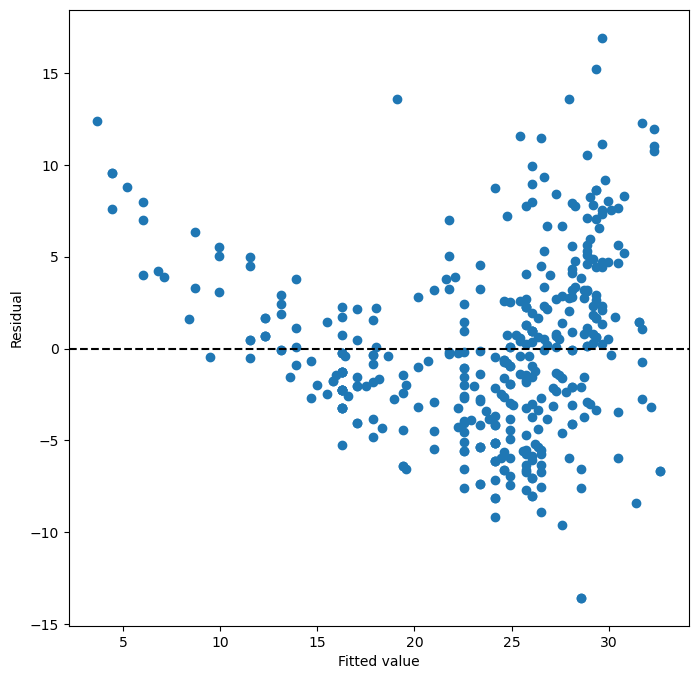

In [115]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

Text(0, 0.5, 'Leverage')

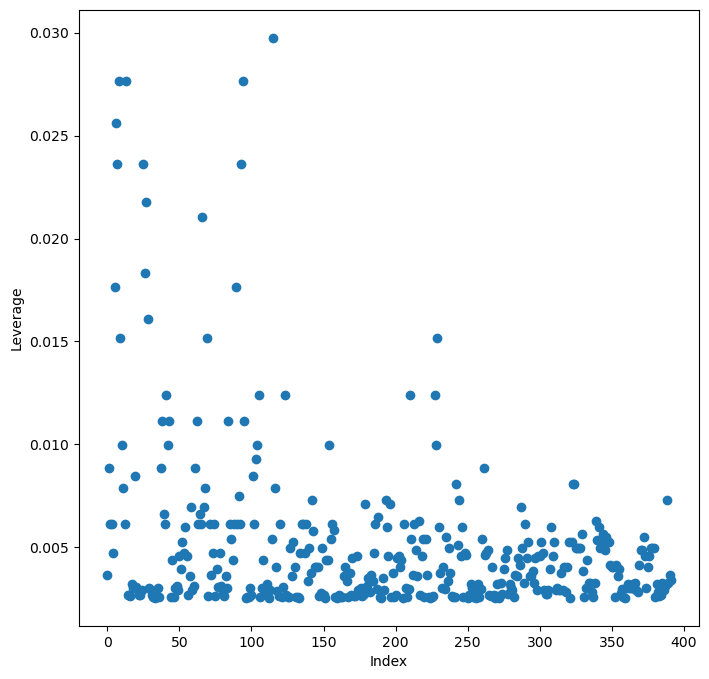

In [116]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

In [117]:
# Grab the index of the point that has the most leverage.
np.argmax(infl.hat_matrix_diag)

115

## (9)

In [118]:
# Load the Auto data set
data = load_data('Auto')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### (a) Scatterplot matrix of the data


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

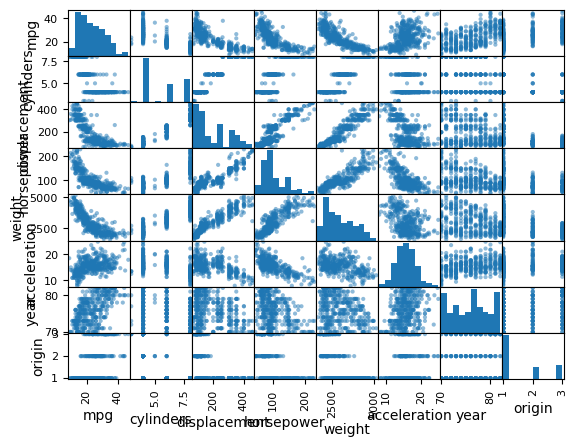

In [119]:
columns = data.columns
pd.plotting.scatter_matrix(data[columns])

### (b) Compute the correlation matrix

In [120]:
numerical_columns = data.select_dtypes(include='number')
correlation_matrx = numerical_columns.corr()
correlation_matrx

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Fit multiple linear regression model

In [121]:
# Clean the data
data = load_data('Auto')
data['origin'] = data['origin'].astype('category')


# Response
y = data.mpg

# Predictors 
terms = data.columns.drop('mpg').drop('name')


# Model 1 with all predictors 
X = MS(terms).fit_transform(data)
model = sm.OLS(y,X)
results1 = model.fit()
# Get the R^2 Value
print(f'R-Squared: {results.rsquared}')

# Model 2 no predictors 
X2 = MS([]).fit_transform(data)
model2 = sm.OLS(y,X2)
results2 = model2.fit()

# Get the R^2 Value
print(f'R-Squared: {results2.rsquared}')

R-Squared: 0.6059482578894348
R-Squared: 3.3306690738754696e-16


In [122]:
# Results 1 has the predictors Results 2 has none
anova_lm(results2,results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993469,0.0,NaN,NaN,NaN
1,383.0,4187.391678,8.0,19631.601791,224.450686,1.789724e-139


#### (I)
Yes, there is a relationship between the predictors and the response. We see the model with all the predictors produces an R-Squared value of 0.82 and the model with no predictors (just the intercept) explains essentially 0% of the variation in gas mileage. 

This is also confirmed in from the anova table. We see that the P value of the model containing all the predictors is ~0. This suggests strong evidence that there is a relationship between the predictors and the response.




#### (II)
The following predictors have a statistically significant relationship with the response: 

- Origin
- Year
- Weight
- Displacement

#### (III)
The coefficient of ```year``` is 0.777, which suggests that for each addition year the MPG of a car increases on average 0.777.


### (d)
Plotting the residuals of the fitted values we see a non-linear relationship. This suggests that we should explore using higher order terms or non-linear terms our model.

Using ```.get_influence()``` we see an observation at index 13 has the highest influence, and we can visually confirm this in the diagnostic plot below.

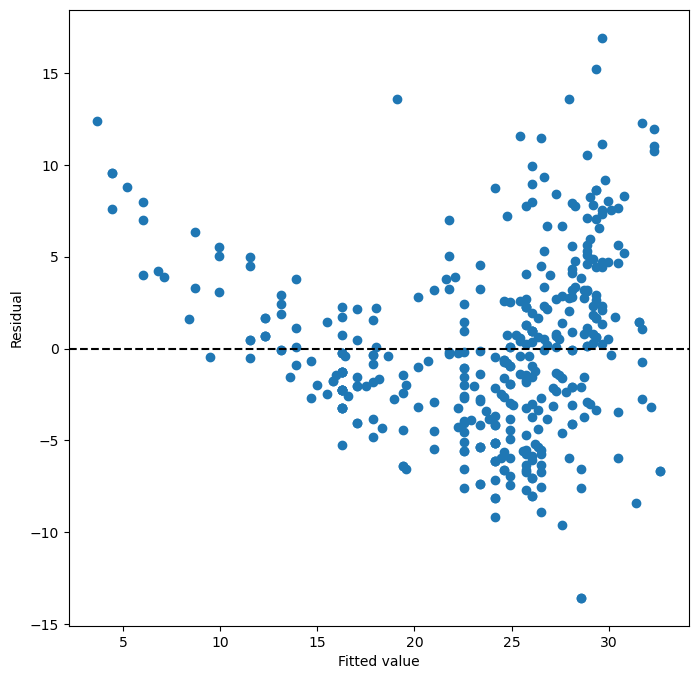

In [123]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

Text(0, 0.5, 'Leverage')

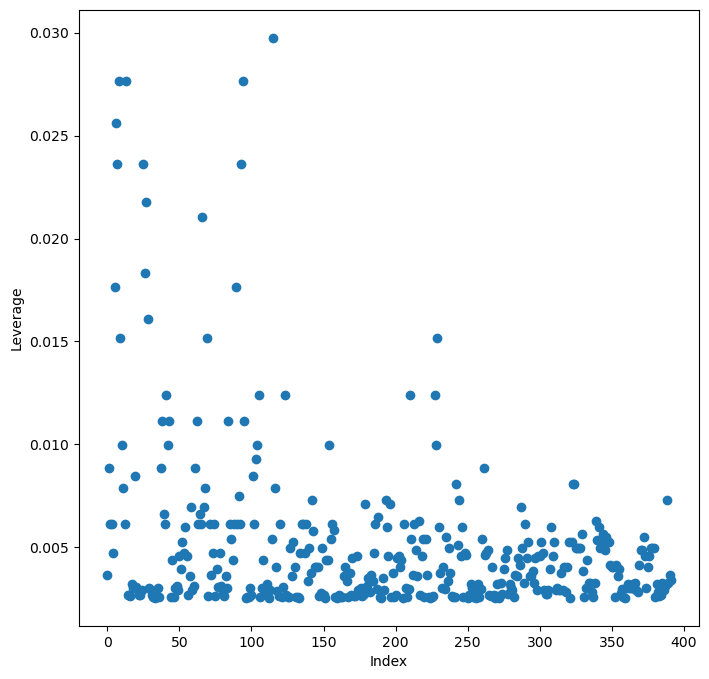

In [124]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

In [125]:
# Grab the index of the point that has the most leverage.
np.argmax(infl.hat_matrix_diag)

115


### (e)

Yes, it appears that there are interactions of predictors are statistically significant. Both interactions, displacement and weight, and also horsepower and acceleration are statistically significant. 

In [126]:
# Try interaction 1
formula2 = 'mpg ~ ' + ' + '.join(terms) + ' + displacement:weight'
model2 = smf.ols(formula=formula2, data=data)
results2 = model2.fit()
print(summarize(results2))

# Try interaction 2
formula3 = 'mpg ~ ' + ' + '.join(terms) + ' + horsepower:acceleration'
model3 = smf.ols(formula=formula3, data=data)
results3 = model3.fit()
print(summarize(results3))

                         coef   std err       t  P>|t|
Intercept           -6.605100  4.328000  -1.526  0.128
origin[T.2]          1.477800  0.519000   2.849  0.005
origin[T.3]          1.146600  0.522000   2.195  0.029
cylinders            0.111800  0.293000   0.382  0.703
displacement        -0.064100  0.011000  -5.726  0.000
horsepower          -0.033500  0.012000  -2.716  0.007
weight              -0.010800  0.001000 -15.094  0.000
acceleration         0.066300  0.088000   0.756  0.450
year                 0.804400  0.046000  17.372  0.000
displacement:weight  0.000022  0.000002   9.933  0.000
                            coef  std err       t  P>|t|
Intercept               -31.6880    4.939  -6.415  0.000
origin[T.2]               1.4544    0.569   2.555  0.011
origin[T.3]               2.0970    0.539   3.890  0.000
cylinders                 0.0661    0.318   0.208  0.835
displacement             -0.0054    0.009  -0.626  0.532
horsepower                0.1221    0.025   4.791  0.


### (f) 
Non-linear predictors

Using non-linear predictors we are able to produce models that can explain more of the variation by looking at the adjusted R-Squared value. We also see that the plot of the residuals has less of a non-linear relationship, indicating we should keep these non-linear terms.

In [127]:
# Non-linear predictors: displacement^2
formula3 = 'mpg ~ ' + ' + '.join(terms) + ' + np.power(displacement,2)'
model3 = smf.ols(formula=formula3, data=data)
results3 = model3.fit()
print(summarize(results3))
print(f'R-Squared Model 3: {results3.rsquared_adj}')

# Non-linear predictors: log(weight)
formula4 = 'mpg ~ ' + ' + '.join(terms) + ' + np.log(weight)'
model4 = smf.ols(formula=formula4, data=data)
results4 = model3.fit()
print(summarize(results4))
print(f'R-Squared Model 4: {results4.rsquared_adj}')


                             coef   std err       t  P>|t|
Intercept                 -9.9359  4.350000  -2.284  0.023
origin[T.2]                0.6807  0.560000   1.217  0.225
origin[T.3]                0.8362  0.551000   1.517  0.130
cylinders                  0.6910  0.321000   2.155  0.032
displacement              -0.1014  0.016000  -6.490  0.000
horsepower                -0.0582  0.013000  -4.389  0.000
weight                    -0.0043  0.001000  -6.602  0.000
acceleration              -0.0227  0.090000  -0.252  0.801
year                       0.7678  0.047000  16.287  0.000
np.power(displacement, 2)  0.0002  0.000023   8.963  0.000
R-Squared Model 3: 0.8513258413996292
                             coef   std err       t  P>|t|
Intercept                 -9.9359  4.350000  -2.284  0.023
origin[T.2]                0.6807  0.560000   1.217  0.225
origin[T.3]                0.8362  0.551000   1.517  0.130
cylinders                  0.6910  0.321000   2.155  0.032
displacement      

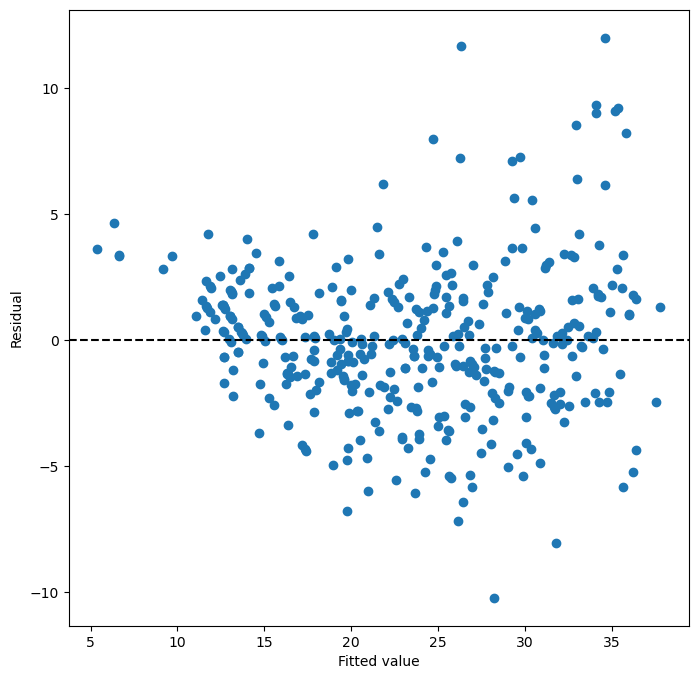

In [128]:
results = results3
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### (10) 
Using the ```Carseats``` data set

#### (b)
Fit a multiple regression model

In [129]:
# Load the data
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [130]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
print(f'R-Squared Model: {results.rsquared_adj}')
summarize(results)

R-Squared Model: 0.23351232697332835


,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


#### (b)

- Intercept: The baseline of rural stores that are in the US. The average of all the sales in the US and are in a rural setting is ~13,000 dollars.
- Price: For each additional dollar a cars is associate a decrease of average sales by approximately $50.
- UrbanYes: If a store is in an urban area sales decrease by $20. Although, this variable is not statistically significant, so we should be careful in our interpretation. 
- US-Yes: If a store is in the US then we see an increase in $1200 in sales compared to stores outside the US.

#### (c) 
Writing the equation out:
f(x)=13.0435−0.0545×Price−0.0219×Urban[Yes]+1.2006×US[Yes]


#### (d)
The only variables which we can not reject the null hypothesis, which is that the coefficient is 0, is the categorical variable Urban[Yes].

#### (e)
Fit new model with statistically significant predictors

In [131]:
y = Carseats['Sales']
X2 = MS(['Price', 'US']).fit_transform(Carseats)
model2 = sm.OLS(y, X2)
results2 = model2.fit()
print(f'R-Squared Model2: {results2.rsquared_adj}')
summarize(results2)

R-Squared Model2: 0.23543045965311693


,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


#### (f)

Both models do not fit the data well at all. The first model has an adjusted R-Squared value of 0.233 and the second one 0.235. These predictors explain very little of the variation in sales.


#### (g) 
Confidence intervals for coefficients.

In [132]:
# Getting the 95% confidence intervals for the coefficients
confidence_intervals = results2.conf_int(alpha=0.05)
print(f'Confidence Intervals:\n {confidence_intervals}')

Confidence Intervals:
                   0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


#### (h)
Outliers & high leverage observations:
Based off of the leverage plot, there seems to be potentially one outlier that has high leverage at index 42. 

Text(0, 0.5, 'Leverage')

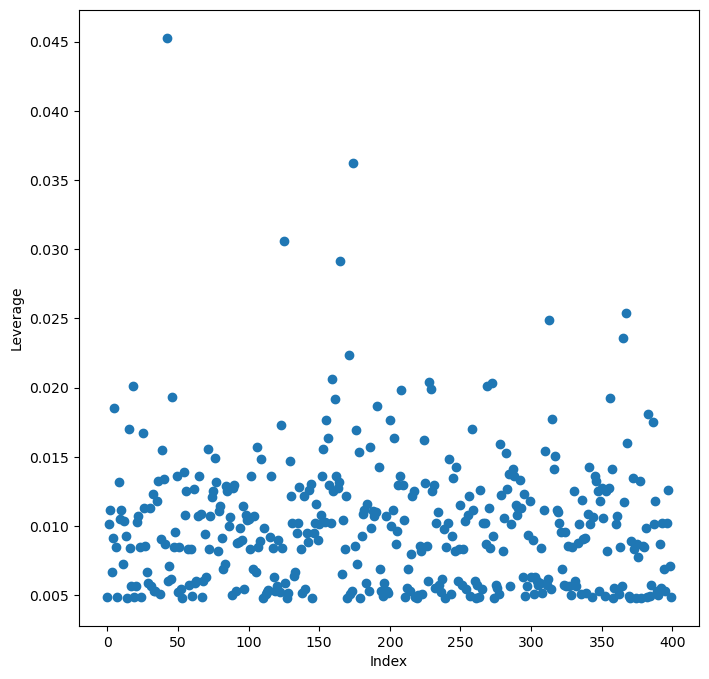

In [133]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

In [134]:
# Grab the index of the point that has the most leverage.
np.argmax(infl.hat_matrix_diag)

42